In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sql Queries

In [ ]:
#Looked at the cities in the city_list for India
select * from city_list 
    where country='India'

#Looked at the data for city Delhi in the city_list for India
select * from city_data 
    where country='India' 
        and city='Delhi'

#Retrieved the Temperature data for Global numbers and for the city of Delhi
select glob.year as Year, glob.avg_temp as Global_Temp, city.avg_temp as Delhi_Temp 
    from global_data as glob 
        join city_data as city 
            on glob.year=city.year 
            where city.country='India' 
            and city.city='Delhi'

#Reconfirmed the data as data for Delhi contained some missing values
select city, count(year) from city_data where country='India' and avg_temp is null group by city

In [200]:
#Reading Final Data having year,avg temperature globally and for Delhi
df=pd.read_csv('final_data.csv')
df.head()

,year,global_temp,delhi_temp
0,1796,8.27,25.03
1,1797,8.51,26.71
2,1798,8.67,24.29
3,1799,8.51,25.28
4,1800,8.48,25.21


In [201]:
df.tail()

,year,global_temp,delhi_temp
213,2009,9.51,26.55
214,2010,9.70,26.52
215,2011,9.52,25.63
216,2012,9.51,25.89
217,2013,9.61,26.71


In [202]:
# Delhi_temp column showed some Null colummns
df.info()
df.delhi_temp.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 3 columns):
year           218 non-null int64
global_temp    218 non-null float64
delhi_temp     201 non-null float64
dtypes: float64(2), int64(1)
memory usage: 5.2 KB


17

In [203]:
df.describe()
# Global temperature - Min 6.86, Max 9.73, Range- 2.87, Percentage Difference- 41.83%
# Delhi temperature - Min 23.7, Max 26.71, Range- 3.01, Percentage Difference- 12.7%

,year,global_temp,delhi_temp
count,218.000000,218.000000,201.000000
mean,1904.500000,8.403532,25.166269
std,63.075352,0.548662,0.594003
min,1796.000000,6.860000,23.700000
25%,1850.250000,8.092500,24.800000
50%,1904.500000,8.415000,25.140000
75%,1958.750000,8.727500,25.550000
max,2013.000000,9.730000,26.710000


In [204]:
df.corr()
# Global temperature and delhi temperature have a positive correlation coefficient of  0.76
# which show strong correlation in both the variables

,year,global_temp,delhi_temp
year,1.000000,0.765267,0.602023
global_temp,0.765267,1.000000,0.762654
delhi_temp,0.602023,0.762654,1.000000


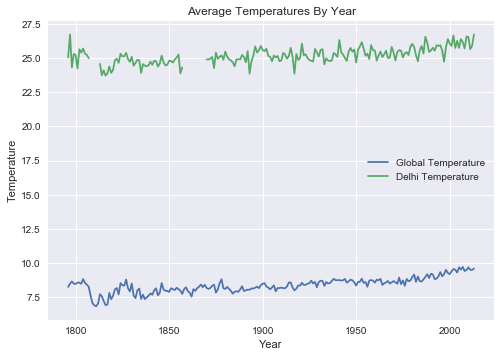

In [205]:
x=df['year']
y1=df['global_temp']
y2=df['delhi_temp']

plt.plot(x, y1, label = "Global Temperature")
plt.plot(x, y2, label = "Delhi Temperature")
plt.xlabel('Year')
plt.ylabel('Temperature')
# Set a title of the current axes.
plt.title('Average Temperatures By Year')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [206]:
#Replacing missing values with means 
mean=df['delhi_temp'].mean()
df['delhi_temp']=df['delhi_temp'].fillna(mean)

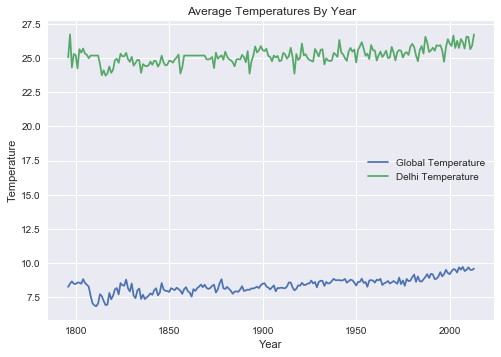

In [207]:
x=df['year']
y1=df['global_temp']
y2=df['delhi_temp']

plt.plot(x, y1, label = "Global Temperature")
plt.plot(x, y2, label = "Delhi Temperature")
plt.xlabel('Year')
plt.ylabel('Temperature')
# Set a title of the current axes.
plt.title('Average Temperatures By Year')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [208]:
# the simple moving average over a period of 10 year
df['Global_MA_10'] = df.global_temp.rolling(10, min_periods=1).mean()
# the simple moving average over a period of 30 years
df['Global_MA_30'] = df.global_temp.rolling(30, min_periods=1).mean()

# the simple moving average over a period of 10 year
df['Delhi_MA_10'] = df.delhi_temp.rolling(10, min_periods=1).mean()


# the simple moving average over a period of 30 year
df['Delhi_MA_30'] = df.delhi_temp.rolling(30, min_periods=1).mean()

In [209]:
df.head()

,year,global_temp,delhi_temp,Global_MA_10,Global_MA_30,Delhi_MA_10,Delhi_MA_30
0,1796,8.27,25.03,8.270000,8.270000,25.030000,25.030000
1,1797,8.51,26.71,8.390000,8.390000,25.870000,25.870000
2,1798,8.67,24.29,8.483333,8.483333,25.343333,25.343333
3,1799,8.51,25.28,8.490000,8.490000,25.327500,25.327500
4,1800,8.48,25.21,8.488000,8.488000,25.304000,25.304000


Text(0, 0.5, 'Temperature [°C]')

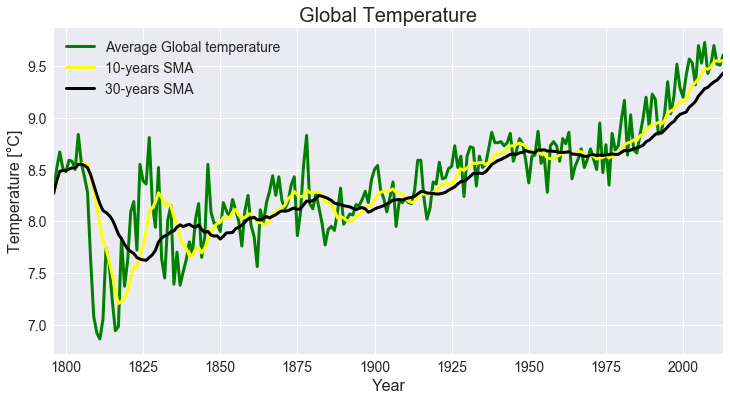

In [210]:
# colors for the line plot
colors = ['green','yellow','black']

# line plot - the yearly average air temperature in Barcelona
global_df.plot(x='year',y=[1,3,4],color=colors, linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average Global temperature', '10-years SMA','30-years SMA'], fontsize=14)

# title and labels
plt.title('Global Temperature', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)

In [211]:
df.head()

,year,global_temp,delhi_temp,Global_MA_10,Global_MA_30,Delhi_MA_10,Delhi_MA_30
0,1796,8.27,25.03,8.270000,8.270000,25.030000,25.030000
1,1797,8.51,26.71,8.390000,8.390000,25.870000,25.870000
2,1798,8.67,24.29,8.483333,8.483333,25.343333,25.343333
3,1799,8.51,25.28,8.490000,8.490000,25.327500,25.327500
4,1800,8.48,25.21,8.488000,8.488000,25.304000,25.304000


In [212]:
df.tail()

,year,global_temp,delhi_temp,Global_MA_10,Global_MA_30,Delhi_MA_10,Delhi_MA_30
213,2009,9.51,26.55,9.493,9.186667,26.097,25.814000
214,2010,9.70,26.52,9.543,9.210667,26.144,25.830667
215,2011,9.52,25.63,9.554,9.222333,26.121,25.825333
216,2012,9.51,25.89,9.548,9.251333,26.047,25.849000
217,2013,9.61,26.71,9.556,9.270667,26.146,25.914333


Text(0, 0.5, 'Temperature [°C]')

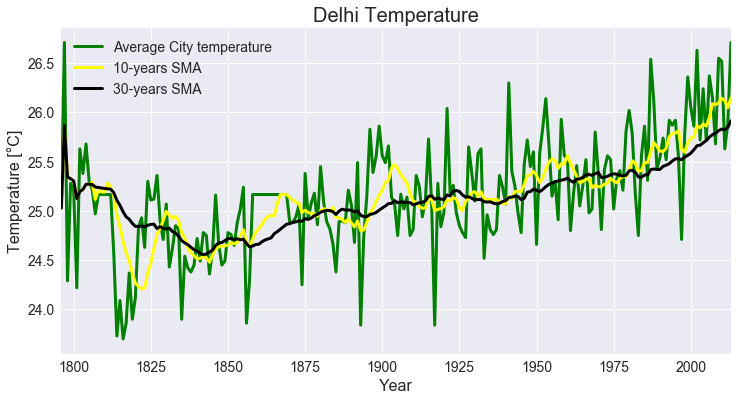

In [214]:
# colors for the line plot
colors = ['green','yellow','black']

# line plot - the yearly average air temperature in Barcelona
df.plot(x='year',y=[2,5,6],color=colors, linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average City temperature', '10-years SMA','30-years SMA'], fontsize=14)

# title and labels
plt.title('Delhi Temperature', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)

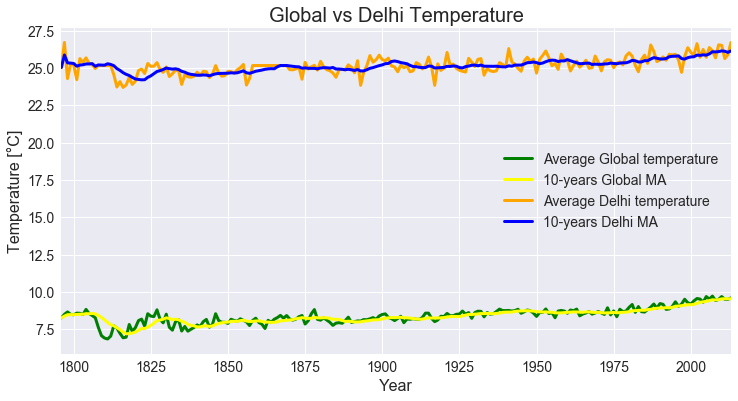

In [144]:
# colors for the line plot
colors = ['green','yellow','orange','blue']

# line plot - the yearly average air temperature in Barcelona
df.plot(x='year',y=[1,3,2,5],color=colors, linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average Global temperature', '10-years Global MA','Average Delhi temperature', '10-years Delhi MA'], fontsize=14)

# title and labels
plt.title('Global vs Delhi Temperature', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)
plt.show()

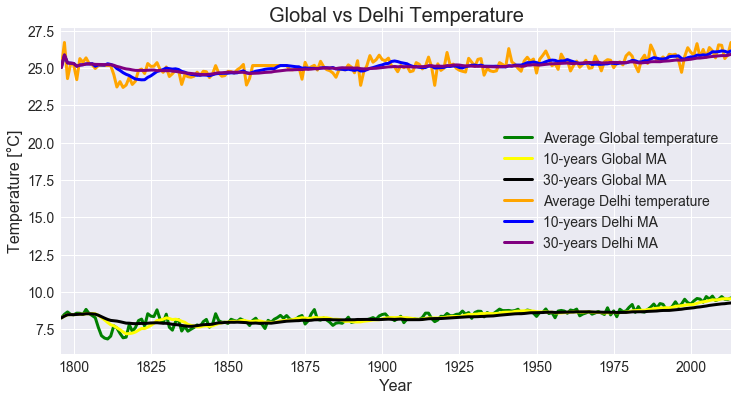

In [145]:
# colors for the line plot
colors = ['green','yellow','black','orange','blue','purple']

# line plot - the yearly average air temperature in Barcelona
df.plot(x='year',y=[1,3,4,2,5,6],color=colors, linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average Global temperature', '10-years Global MA','30-years Global MA','Average Delhi temperature', '10-years Delhi MA','30-years Delhi MA'], fontsize=14)

# title and labels
plt.title('Global vs Delhi Temperature', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)
plt.show()

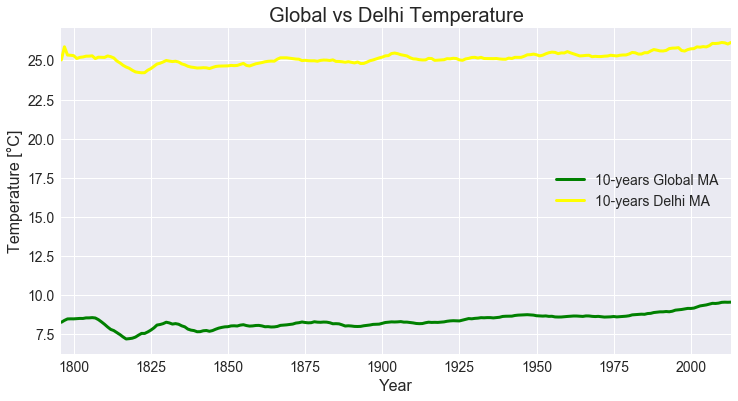

In [198]:
# colors for the line plot
colors = ['green','yellow','black','orange','blue','purple']

# line plot - the yearly average air temperature in Barcelona
df.plot(x='year',y=[3,5],color=colors, linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['10-years Global MA', '10-years Delhi MA'], fontsize=14)

# title and labels
plt.title('Global vs Delhi Temperature', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)
plt.show()

In [166]:
#Considering percentage change over the years
avgInc_perYear=(df['global_temp'].max()-df['global_temp'].min())/218
round(avgInc_perYear,4)

0.0132

In [164]:
#Considering percentage change over the years
avgInc_perYear=(df['delhi_temp'].max()-df['delhi_temp'].min())/218
round(avgInc_perYear,4)

0.0138

In [171]:
df[df['year']==1973]

,year,global_temp,delhi_temp,Global_MA_10,Global_MA_30,Delhi_MA_10,Delhi_MA_30
177,1973,8.95,25.56,8.611,8.652,25.281,25.351


In [188]:
y=float(df[df['year']==2013]['global_temp'])
x=float(df[df['year']==1973]['global_temp'])
global_last40=(y-x)/40
global_last40

0.016500000000000004

In [196]:
y=float(df[df['year']==2013]['global_temp'])
x=float(df[df['year']==1983]['global_temp'])
global_last30=(y-x)/30
global_last30

0.019333333333333334

In [193]:
y=float(df[df['year']==2013]['delhi_temp'])
x=float(df[df['year']==1973]['delhi_temp'])
delhi_last40=(y-x)/40
delhi_last40

0.028750000000000053

In [194]:
y=float(df[df['year']==2013]['delhi_temp'])
x=float(df[df['year']==1983]['delhi_temp'])
delhi_last30=(y-x)/30
delhi_last30

0.06533333333333337

In [ ]:
1. During the late 1790s, temperature was on the higher side, at similar ranges as was in 1970s.
There was a major drop in temperatures in the period 1810-1825.
This drop was very significant as global average fell by 1.5 Deg Celsius which is about 20% drop.

2. The drop was even more terms of magnitude where the temperatures fell by about 3 Deg Cel, about 13% drop.
May be this is the reason it was referred to as Little Ice Age (LIA) period by some climate experts.

3. Post 1825, there was a gradual increase in the temperatures and till 1975, it can be seen that global temperatures
regained the values which used to be exist in late 1790s. So it took about 150 years to recover from the gradual dip which
occurred in early 1800s.

4. Average global temperature increase over the 218 years considered in the dataset is 0.0132 Deg Celsius.

5. Average temperature increase for Delhi is 0.0138, which although slightly higher but is very close to global average

6. Considering the temperature rise in last 40 years globally, the average increase globally is 0.0165 which is 25% more than
the global average increase over last 218 years

7. Considering the temperature rise in last 40 years for Delhi, the average increase in Delhi is 0.02875 which is about 100% more than
the average increase for the city over last 218 years

This shows the rate of increase of temperature increase is considerably high in the last 40 years.

8 If we decrease our range to consider the last 30 years, for the city of Delhi this average rate increases and comes out to
be 0.065 Deg Cel which is 364% more than average rate over the last 218 years. This figure is worth noticing.
Similarly global average also increases although less rapidly and average increase for last 30 years is 0.019, an increase of about 45%
from avearge of over 218 years.

9. In terms of magnitude, there is significant difference in Global temperatures and Temperature of Delhi city.
The mean Global temperature is 8.403532 whereas for the city of Delhi the value is 25.166269, 
a differnce of about 16.8 Deg Cel, making the temperature of Delhi almost 3 times the Global average.

10.  Global temperature and temperature of Delhi have a positive correlation coefficient of  0.76 which shows strong 
correlation in both the variables


In [242]:
import numpy as np
x=np.array([-1,2,7])

In [243]:
x.min()

-1

In [246]:
(x-x.min())/8

array([0.   , 0.375, 1.   ])

In [245]:
x.max()

7